In [2]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [3]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
columns = ['TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS']

In [5]:
cat = Table(fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/sweep/9.0/sweep-120p015-130p020.fits', columns=columns))
print(len(cat))

mask = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
print(np.sum(mask), np.sum(mask)/len(mask))
cat = cat[mask]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cat['gmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_G'], 1e-7, None))
    cat['rmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_R'], 1e-7, None))
    cat['zmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_Z'], 1e-7, None))

4098121
4095804 0.999434618939


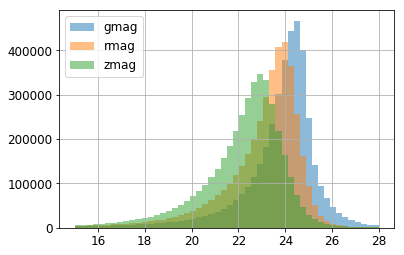

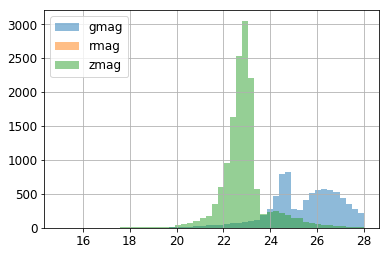

In [6]:
plt.hist(cat['gmag'], 50, range=(15, 28), alpha=0.5, label='gmag')
plt.hist(cat['rmag'], 50, range=(15, 28), alpha=0.5, label='rmag')
plt.hist(cat['zmag'], 50, range=(15, 28), alpha=0.5, label='zmag')
plt.legend(loc='upper left')
plt.grid()
plt.show()

mask = cat['FLUX_R']<0
plt.hist(cat['gmag'][mask], 50, range=(15, 28), alpha=0.5, label='gmag')
plt.hist(cat['rmag'][mask], 50, range=(15, 28), alpha=0.5, label='rmag')
plt.hist(cat['zmag'][mask], 50, range=(15, 28), alpha=0.5, label='zmag')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [19]:
mask = cat['FLUX_R']<0
print(np.sum(mask))
mask &= (cat['gmag']<22.5) & (cat['zmag']<21.) & (cat['NOBS_R']>=2) & (cat['TYPE']==b'PSF')
mask &= cat['MASKBITS']==0
# mask &= cat['ANYMASK_R']==0
print(np.sum(mask))

15367
10


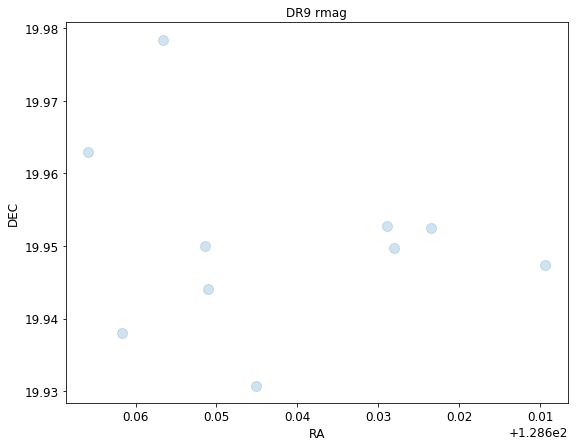

In [20]:
plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.2)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.gca().invert_xaxis()
plt.show()

In [21]:
t = Table()
t['RA'] = cat['RA'][mask]
t['DEC'] = cat['DEC'][mask]
t.write('visual_inspection.fits', overwrite=True)

In [18]:
t = Table()
# t['type'], t['counts'] = np.unique(cat['TYPE'], return_counts=True)
# t['frac (%)'] = t['counts']/len(cat)*100
t['type'], t['counts'] = np.unique(cat['TYPE'][mask], return_counts=True)
t['frac (%)'] = t['counts']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('counts')
t

type,counts,frac (%)
bytes3,int64,float64
PSF,10,100.0


In [11]:
cat[mask]

TYPE,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,NOBS_G,NOBS_R,NOBS_Z,MASKBITS,gmag,rmag,zmag
bytes3,float64,float64,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32
REX,128.599158184,19.990173095,1.86581,-0.000939665,7.49244,4,3,4,0,21.8228,40.0,20.3134
EXP,128.604460279,19.9537751226,1.14982,-0.0145428,6.18189,3,2,3,0,22.3484,40.0,20.5222
REX,128.604652984,19.9692402028,1.08734,-0.000869627,4.12801,4,3,4,0,22.4091,40.0,20.9606
REX,128.607954823,19.9513009818,3.65718,-0.0164724,24.9133,3,2,3,0,21.0921,40.0,19.0089
PSF,128.60940964,19.9473589894,5.51853,-0.00150707,17.2552,3,2,3,0,20.6454,40.0,19.4077
EXP,128.610695818,19.9425289728,1.25897,-0.00326104,4.41039,3,2,3,0,22.25,40.0,20.8888
PSF,128.62351379,19.9524395522,3.94197,-0.00170767,56.2307,3,2,3,0,21.0107,40.0,18.1251
DEV,128.627888566,19.9521400006,1.43205,-0.00100087,11.3874,3,2,3,0,22.1101,40.0,19.8589
PSF,128.628009711,19.9497409155,1.43977,-0.0018453,7.40198,3,2,3,0,22.1043,40.0,20.3266
